In [1]:
# The code was removed by Watson Studio for sharing.

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942,2,155623,7855,42
1,327662,a,26046,12,21781,55801,1175
2,468453,c,1358,4,56177,8067,60
3,96996,a,264,3,168793,27064,9
4,131465,c,4271,4,112223,13986,83


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train.head(5)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942,2,155623,7855,42
1,327662,a,26046,12,21781,55801,1175
2,468453,c,1358,4,56177,8067,60
3,96996,a,264,3,168793,27064,9
4,131465,c,4271,4,112223,13986,83


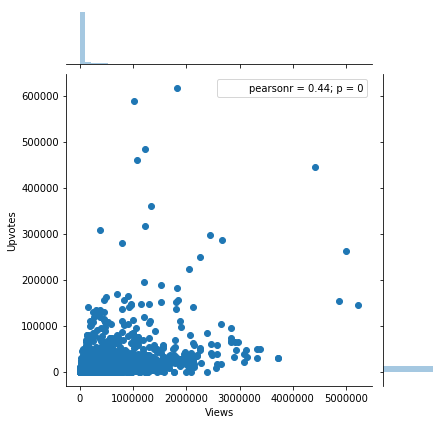

In [4]:
sns.jointplot(x="Views", y="Upvotes", data=train)

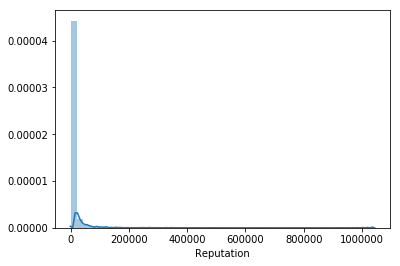

In [5]:
sns.distplot(train['Reputation'])

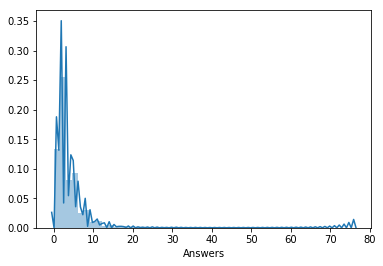

In [6]:
sns.distplot(train['Answers'])

In [7]:
h=train['Answers']
train['Answers']=(train['Answers']-train['Answers'].mean())/(train['Answers'].std())

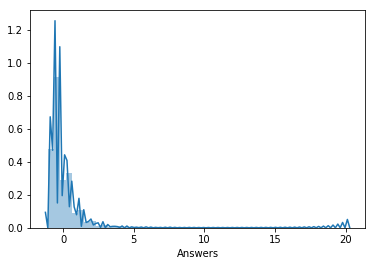

In [8]:
sns.distplot(train['Answers'])

In [9]:
train.loc[train.Tag == 'a',"Tag"] = 0
train.loc[train.Tag == 'c', "Tag"] = 1
train.loc[train.Tag == 'r','Tag'] = 2
train.loc[train.Tag == 'j', 'Tag'] = 3
train.loc[train.Tag == 'p', 'Tag'] = 4
train.loc[train.Tag == 's', 'Tag'] = 5
train.loc[train.Tag == 'h', 'Tag'] = 6
train.loc[train.Tag == 'o', 'Tag'] = 7
train.loc[train.Tag == 'i', 'Tag'] = 8
train.loc[train.Tag == 'x', 'Tag'] = 9

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Relation of upvotes and the tags')

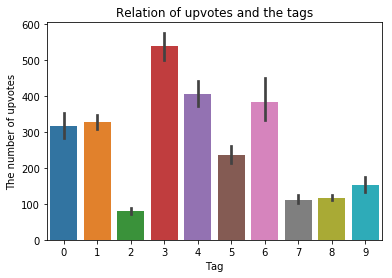

In [10]:
sns.barplot(x="Tag",y="Upvotes", data=train)
plt.ylabel("The number of upvotes")
plt.xlabel("Tag")
plt.title("Relation of upvotes and the tags")

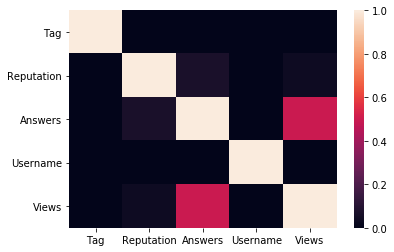

In [11]:
T = (train.loc[:, ['Tag', 'Reputation', 'Answers', 'Username', 'Views']]).corr()
sns.heatmap(T, vmin=0,vmax=1)

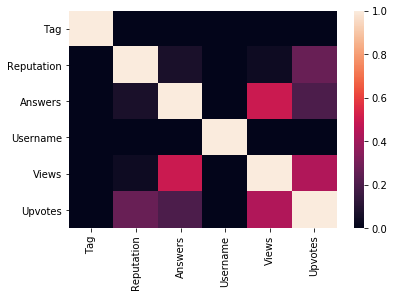

In [12]:
T = (train.loc[:, ['Tag', 'Reputation', 'Answers', 'Username', 'Views','Upvotes']]).corr()
sns.heatmap(T, vmin=0,vmax=1)

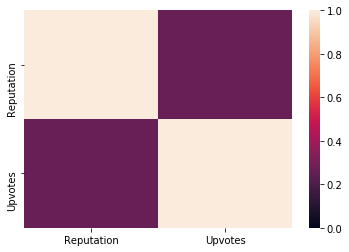

In [13]:
W1 = (train.loc[:, ['Reputation', 'Upvotes']]).corr()
sns.heatmap(W1, vmin=0,vmax=1)

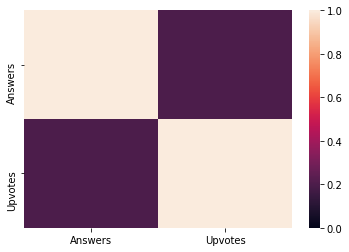

In [14]:
W2 = (train.loc[:, ['Answers', 'Upvotes']]).corr()
sns.heatmap(W2, vmin=0,vmax=1)

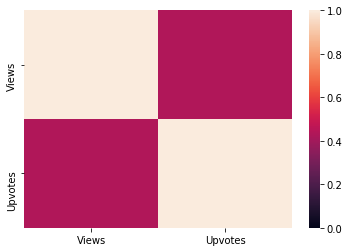

In [15]:
W3 = (train.loc[:, ['Views', 'Upvotes']]).corr()
sns.heatmap(W3, vmin=0,vmax=1)

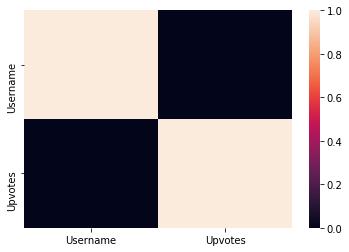

In [16]:
W3 = (train.loc[:, ['Username', 'Upvotes']]).corr()
sns.heatmap(W3, vmin=0,vmax=1)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [18]:
%time
dec_tree_regressor  =   DecisionTreeRegressor()


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


In [19]:
%time
rand_for_regressor  =   RandomForestRegressor(n_estimators=50)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 µs


In [20]:
%time
ext_regressor       =   ExtraTreesRegressor()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


In [21]:
%time
knn_regressor       =   KNeighborsRegressor()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs


In [22]:
from sklearn.model_selection import train_test_split

In [34]:
data=train.loc[:,['Answers','Views','Reputation']]
labels=train.loc[:,['Upvotes']]

In [35]:
 X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

In [36]:
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

In [37]:
%time
rand_for_regressor.fit(X_train,y_train)  

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.78 µs


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
mod_2=rand_for_regressor.predict(X_test)

In [ ]:
import statsmodels.api as sm
X_test=sm.add_constant(X_test)
model=sm.OLS(labels,train).fit()
model.summary()

In [31]:
from sklearn.metrics import mean_squared_error
x= mean_squared_error(y_test, mod_2)
y=np.sqrt(x)
y

1701.775413737143